In [40]:
import pandas as pd

netflix=pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Mandatory part
- 한국의 넷플릭스 작품 개수
- 기준 열 : 국가 명

In [14]:
netflix[netflix['country']=='South Korea']['country'].count()

199

## Bonus part
- 단일 국가를 기준으로 국가별 작품 수 구하기
- 내림차 순 정렬

In [79]:
from collections import Counter

tmp_country=Counter(netflix['country'])
del tmp_country['nan']##왜 이거 제거 안돼 ?
tmp_country.pop('nan',None)##얘도 안됨 

In [80]:
for key,value in list(tmp_country.items()): ####루프 돌면서 딕셔너리의 키가 삭제되기 때문에 런타임 에러나서 list 써줘야됨 
    if ', ' in str(key):
        tmp_keys=key.split(', ')
        print(tmp_keys)
        for i in tmp_keys:
            tmp_country[i]+=1
        tmp_country.pop(key,None)  ###복수 국가 키 제거
    else:
        pass

['United States', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia']
['Germany', 'Czech Republic']
['United States', 'India', 'France']
['China', 'Canada', 'United States']
['South Africa', 'United States', 'Japan']
['Spain', 'United States']
['United Kingdom', 'United States']
['United States', 'United Kingdom']
['France', 'United States']
['United States', 'Singapore']
['United Kingdom', 'Australia', 'France']
['United Kingdom', 'Australia', 'France', 'United States']
['United States', 'Canada']
['Germany', 'United States']
['South Africa', 'United States']
['United States', 'Mexico']
['United States', 'Italy', 'France', 'Japan']
['United States', 'Italy', 'Romania', 'United Kingdom']
['Australia', 'United States']
['Argentina', 'Venezuela']
['United States', 'United Kingdom', 'Canada']
['China', 'Hong Kong']
['United States', 'China', 'Hong Kong']
['Italy', 'United States']
['United States', 'Germany']
['United Kingdom', 'Canada', 'United States']
['', 'South Korea']


In [83]:
country=sorted(tmp_country.items(),key=lambda x:x[1],reverse=True)
counties=[i[0] for i in country]
counts=[i[1] for i in country]
del counties[2]
del counts[2]

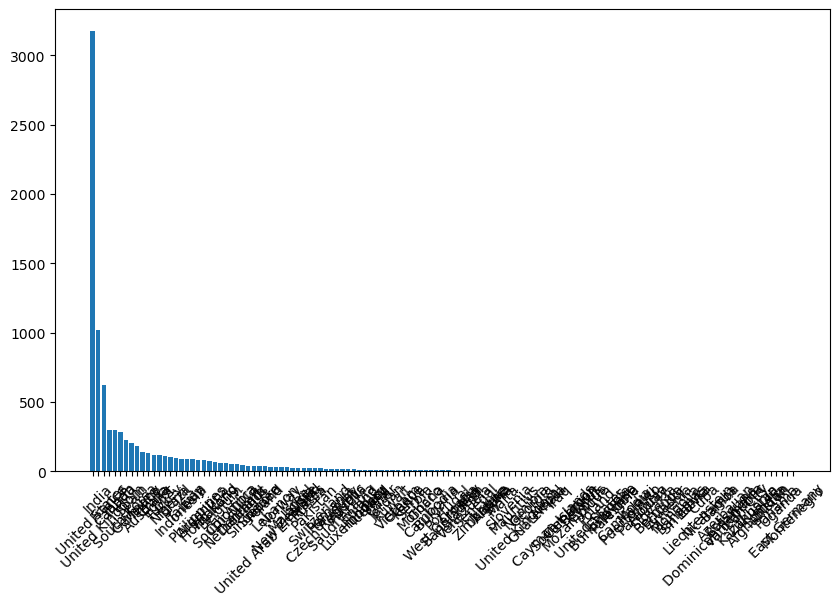

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.bar(np.arange(len(counties)), counts)
plt.xticks(np.arange(len(counties)), counties,rotation=45)
plt.show(10)

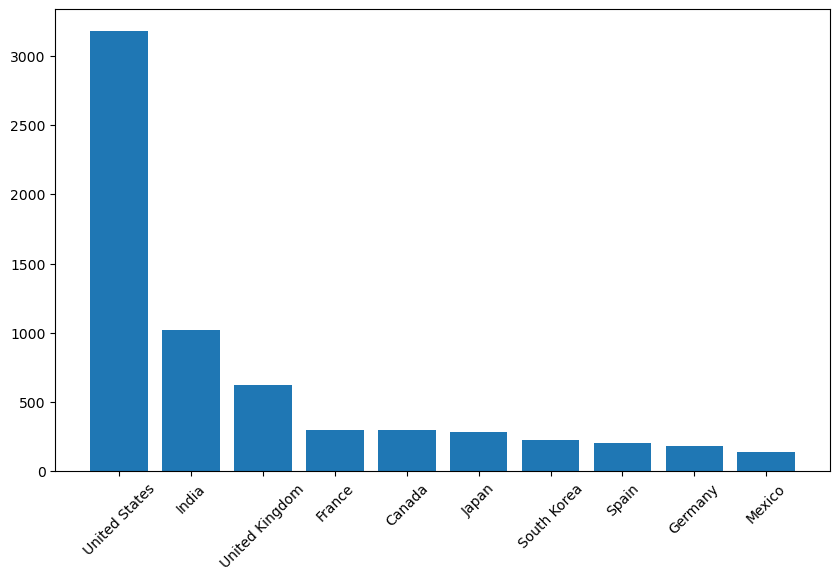

In [85]:
## 상위 10개만 그래프 그리기

plt.figure(figsize=(10,6))
plt.bar(np.arange(len(counties[:10])), counts[:10])
plt.xticks(np.arange(len(counties[:10])), counties[:10],rotation=45)
plt.show(10)